In [76]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [77]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import numpy as np
from math import log
from CIoTS import *

In [78]:
dimensions = 3
max_p = 4
incoming_edges = 2

In [79]:
generator = CausalTSGenerator(dimensions=dimensions, max_p=max_p, data_length=10000, incoming_edges=incoming_edges)
ts = generator.generate()

In [80]:
predicted_graph = pc_chen(partial_corr_test, ts, 4, 0.05)

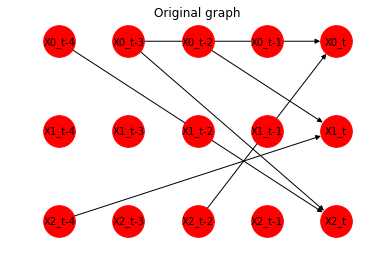

In [81]:
plt.title('Original graph')
generator.draw_graph()

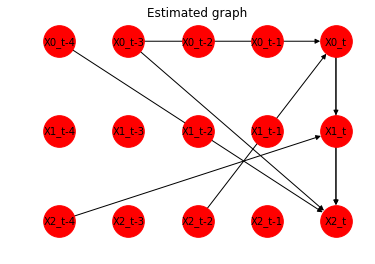

In [82]:
plt.title("Estimated graph")
draw_graph(predicted_graph, dimensions, max_p)

In [83]:
pd.DataFrame(evaluate_edges(generator.graph, predicted_graph), index=[0])

,accuracy,f1-score,matthews_corrcoef
0,0.980952,0.714286,0.712453


In [84]:
p_ranking, ic_scores = var_order_select(ts, drop=False)

/home/marcus/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]


In [85]:
pd.DataFrame(p_ranking)

,aic,bic,fpe,hqic
0,9,9,9,9
1,10,10,10,10
2,13,13,13,13
3,14,14,14,14
4,15,15,15,15
5,4,4,4,4
6,17,17,17,17
7,16,16,16,16
8,18,18,18,18
9,6,6,6,6


In [86]:
pd.DataFrame(ic_scores)

,aic,bic,fpe,hqic
0,-72.060510,-71.999839,5.047529e-32,-72.039971
1,-72.058334,-71.991162,5.060044e-32,-72.035595
2,-72.053056,-71.966383,5.091411e-32,-72.023715
3,-72.050884,-71.957710,5.104020e-32,-72.019342
4,-71.355983,-71.256309,1.022903e-31,-71.322241
5,-70.683614,-70.655445,1.997132e-31,-70.674078
6,-31.915422,-31.802747,1.376939e-14,-31.877279
7,-31.296426,-31.190251,2.556291e-14,-31.260483
8,-29.707962,-29.588786,1.252373e-13,-29.667618
9,-25.333297,-25.292127,9.909664e-12,-25.319360
